In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('all_stocks_5yr.csv', delimiter = ',', on_bad_lines = 'skip')

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.info()
import warnings
warnings.filterwarnings('ignore')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [6]:
print(df['Name'].nunique())
print(df['Name'].unique())
print(df['Name'].value_counts())

505
['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF'
 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'CAG'
 'CAH' 'CAT' 'CA' 'CBG' 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN'
 'CFG' 'CF' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CINF' 'CI' 'CLX' 'CL' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'C' 'DAL' 'DE' 'DFS' 'DGX' 'DG' 'DHI' 'DHR' 'DISCA' 'DISCK'
 'DISH' 'DIS' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN'
 'DWDP' 'DXC' 'D' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX

In [7]:
df.rename(columns = {'Name': 'name'}, inplace = True)

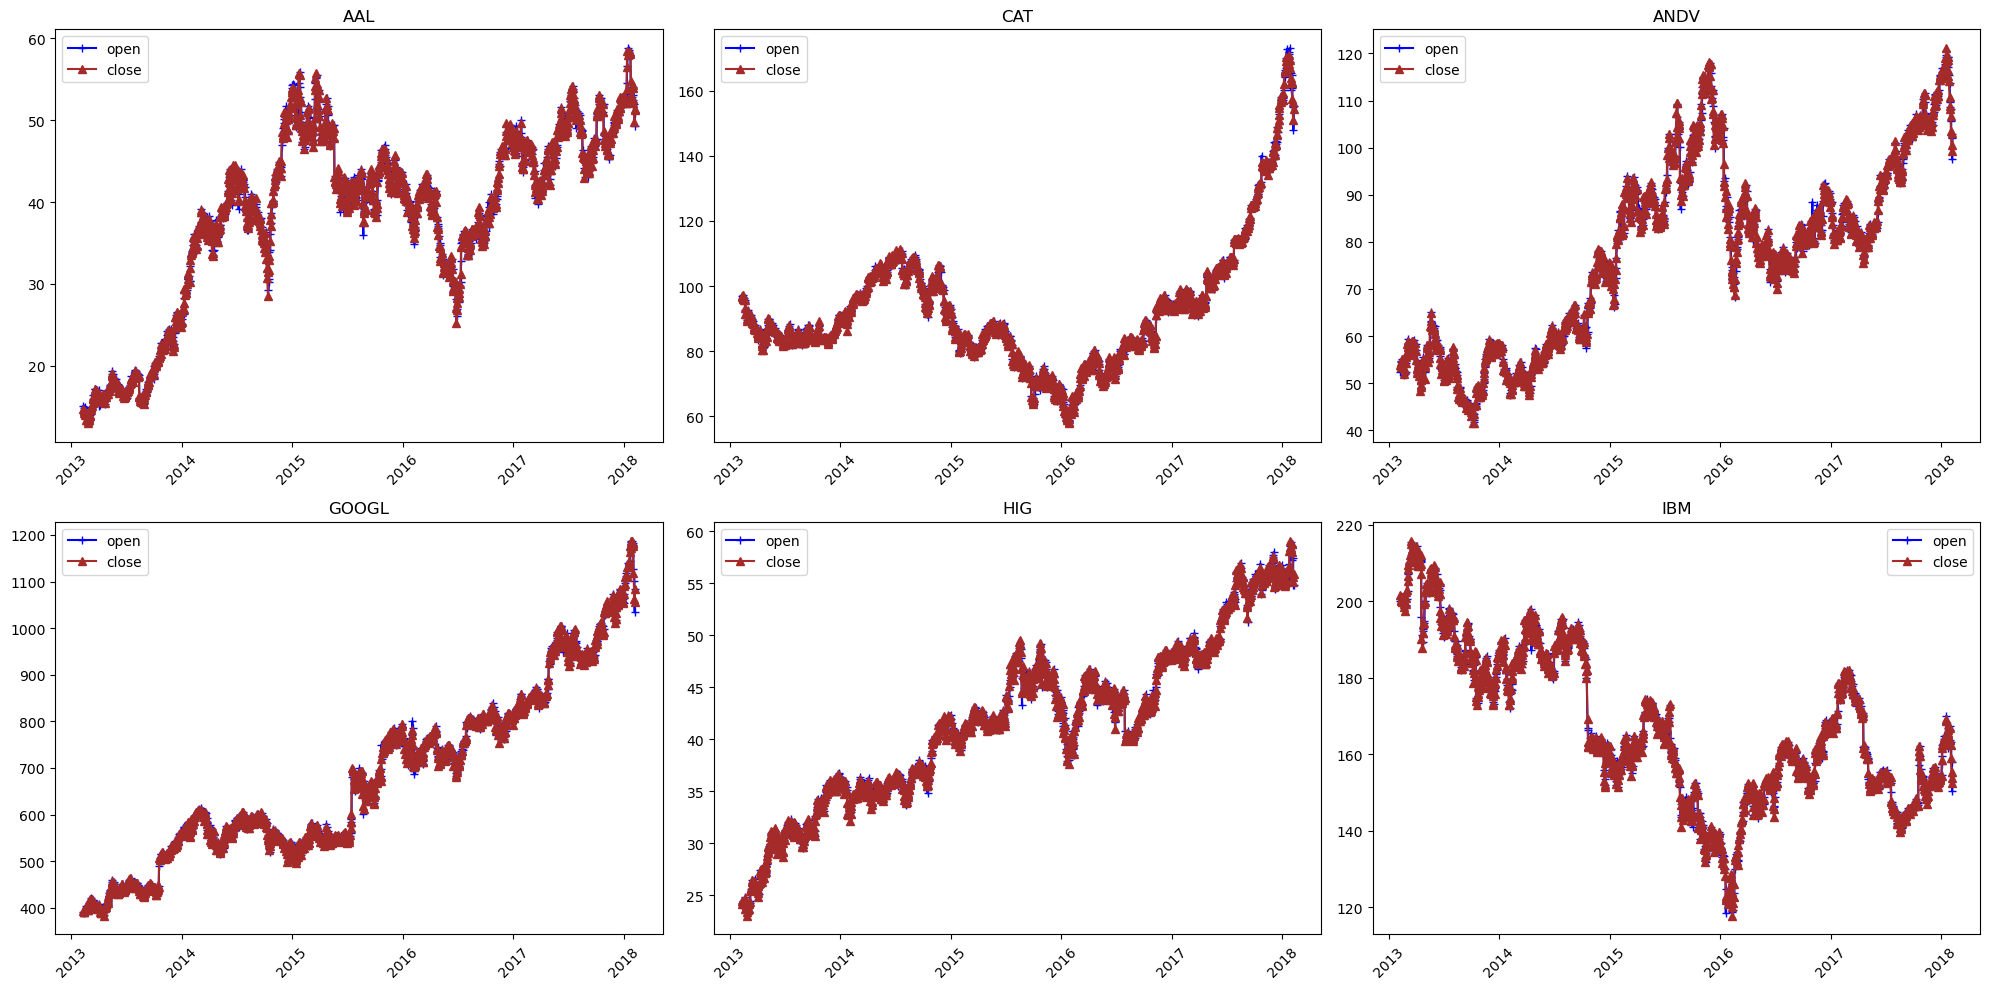

In [8]:
import matplotlib.pyplot as plt

# List of companies
companies = ['AAL', 'CAT', 'ANDV', 'GOOGL', 'HIG', 'IBM']

plt.figure(figsize = (20,10))
for index, company in enumerate(companies, 1):
    plt.subplot(2,3,index)
    p = df[df['name'] == company]
    plt.plot(p['date'], p['open'], color = 'blue', marker ='+', label = 'open' )
    plt.plot(p['date'], p['close'], color = 'brown', marker ='^',label = 'close' )
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.title(company)
plt.show()
    


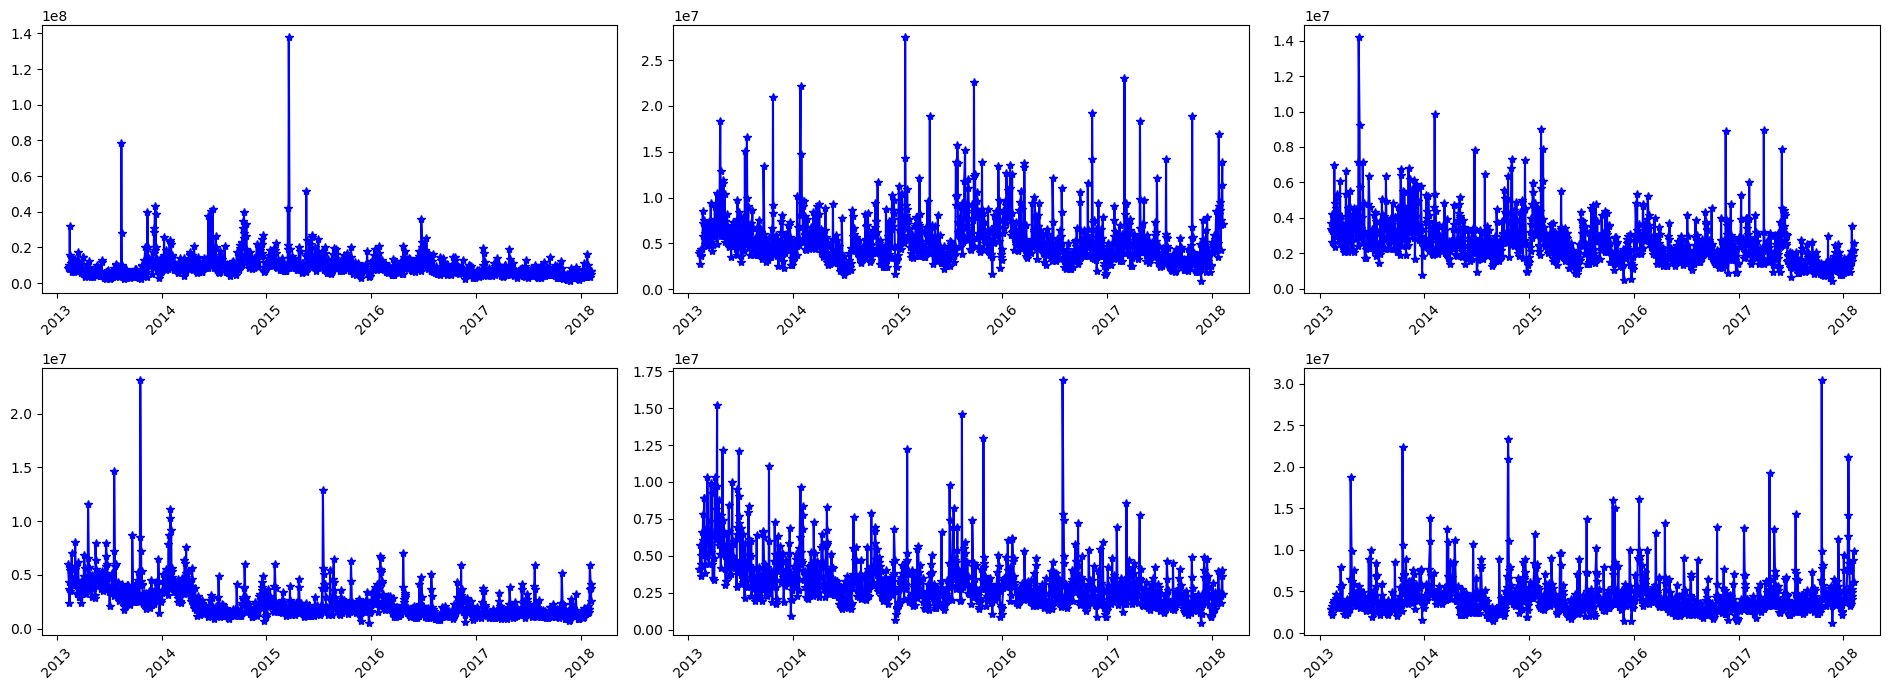

In [9]:
plt.figure(figsize = (19,7))
for index, company in enumerate(companies,1):
    p = df[df['name'] == company]
    plt.subplot(2,3,index)
    plt.plot(p['date'],p['volume'],color ='b',label = 'volume', marker = '*')
    plt.xticks(rotation = 45)
    plt.tight_layout()
plt.show()

#data is analysed BY SAMARJEET PATEL

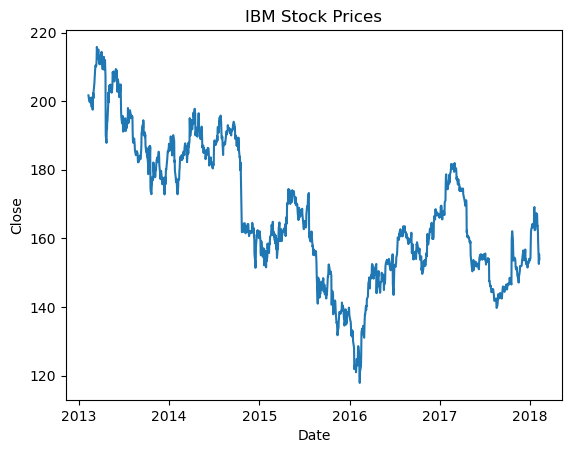

In [10]:
from datetime import datetime
ibm = df[df['name'] == 'IBM']
prediction_range = ibm.loc[(ibm['date'] > datetime(2013,1,1))
 & (ibm['date']<datetime(2018,1,1))]
plt.plot(ibm['date'],ibm['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("IBM Stock Prices")
plt.show()

In [11]:
import math
closed_data = ibm.filter(['close']) #selecting only close columns
closed_values = closed_data.values #converting into numpy array
training = math.ceil(len(closed_values)*0.8) # using 80% of data for training 
training

1008

## preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(closed_values)

train_data = scaled_data[0:training]
x_train = []
y_train = []
for i in range(30, training):
    x_train.append(train_data[i-30:i])
    y_train.append(train_data[i])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


## selection of model

In [13]:
from tensorflow import keras
model  = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64, 
                            return_sequences=True, 
                            input_shape=(x_train.shape[1], 1)))

# Add another LSTM layer
model.add(keras.layers.LSTM(units=64))

# Add a Dense layer with 32 units
model.add(keras.layers.Dense(32))

# Add Dropout for regularization
model.add(keras.layers.Dropout(0.5))

# Add the output layer
model.add(keras.layers.Dense(1))

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)



Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0072
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0056
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0056
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0065
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0048
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0044
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0050
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036


In [27]:
# save the model
model.save('models/model.keras')

In [21]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = closed_values[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MSE 17.205860077528165
RMSE 4.147994705581019


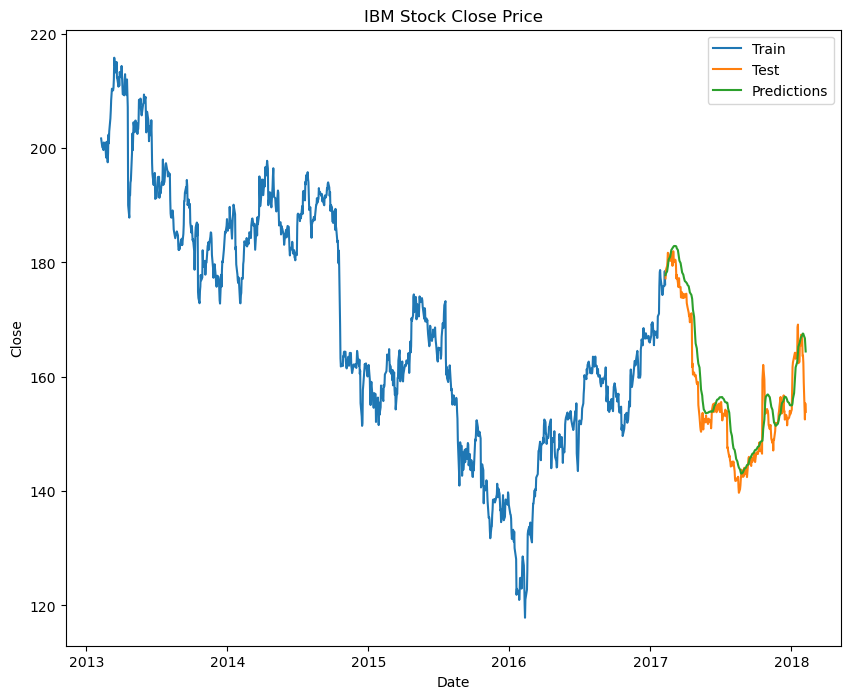

In [22]:
train = ibm[:training]
test = ibm[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('IBM Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])

# This code is modified by SAMARJEET PATEL
